<h1 style="font-size: 40px; margin-bottom: 0px;">Week 6 Assignment</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h1 style="color:#FF0000;"><strong><u>KEY</u></strong></h1>

<strong><u>Due: Saturday, October 11 at 11:59PM</u></strong>

<strong><u>Total points: 5 pts</u></strong>

<strong><u>To turn in your assignment:</u></strong>
<ol>
    <li>Complete assignment and make sure you have all the outputs requested for the notebook</li>
    <li>Go to your server's file directory and locate the <code>week_6_homework</code> directory containing all your outputs from this assignment including this notebook</li>
    <li>Right click and select <strong>Download as an Archive</strong> to download the <code>week_6_homework</code> directory as a ZIP folder. Do not mix up with <strong>Download Current Folder as an Archive</strong></li>
    <li>Upload your ZIP folder to your individual feedback Google Drive folder under <code>MCB201B</code></li>
</ol>

<strong><u>How this assignment will be graded:</u></strong>

You will be graded on whether or not you have <u>all requested outputs and files</u> and if your output is correct. You will also be graded on if your code is expected to be able to run without errors. There can be more than one correct way to answer a question. If you find that you prefer to separate your answer for a single question into multiple code cells, feel free to do so.
<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Question 1</h2>

2pts

Import the <code>chembl-dataset.csv</code> for cleaning. This dataset contains information on different small molecules that can be used to train a machine learning model to predict compound stability, and this week's assignment is practice to prepare a publicly available dataset and classify compound stability before it can be used for training.

You will need to import the full dataset without losing rows or columns of data. The full DataFrame should contain 25306 rows (not including the header) and 48 columns. Make sure that all values are properly aligned to their respective column (e.g. You should not have a SMILES structure in the <code>"Standard Type"</code> column. Export the cleaned dataset as a <code>.tsv</code> file into your <code>week_6_homework</code> directory to be included as part of your assignment submission.

In [2]:
#Original dataset is structured weird, so I imported it differently
#Import into a dataframe but in this case, use a nonsense separator to get everything imported into a single data column
mess = pd.read_csv('./chembl-dataset.csv',
                   header=None, #No header
                   names=['data'], #Name column as data
                   sep = '?', #Nonsense separator 
                  )

print(mess)

                                                    data
0      Molecule ChEMBL ID;"Molecule Name";"Molecule M...
1      CHEMBL455477;"BILIVERDIN";"None";"582.66";"1";...
2      CHEMBL79042;"";"None";"672.68";"2";"2.76";"19"...
3      CHEMBL5438457;"";"None";"345.74";"0";"1.51";"1...
4      CHEMBL5423557;"";"None";"307.31";"0";"2.21";"1...
...                                                  ...
25302  CHEMBL4238186;"";"None";"487.56";"0";"3.60";"T...
25303  CHEMBL569;"PROCAINE";"4.0";"236.31";"0";"1.77"...
25304  CHEMBL5174830;"";"None";"331.42";"0";"2.61";"1...
25305  CHEMBL386630;"TESTOSTERONE";"4.0";"288.43";"0"...
25306  CHEMBL5185001;"";"None";"440.46";"0";"3.84";"2...

[25307 rows x 1 columns]


In [3]:
#Check with original dataset to see if all rows are here
len(mess)

25307

In [4]:
#Attempt a clean up with one of the iffy rows
#I'll show my thought process on how I approached this

#We can get creative with how we split each element now that our data imported
#Rather than split using a single semicolon, can use semicolon and a double quote together as the delimiter
print(mess.loc[3, 'data'].split(';"'))

['CHEMBL5438457', '"', 'None"', '345.74"', '0"', '1.51"', '15; J27644"', 'O=C(NO)c1ccc(Cn2c(=O)[nH]c(=O)c3cccc(Cl)c32)cc1"', 'Stability"', '\'=\'"', '100.0"', '%"', '"', '"', '"', 'UO_0000187"', '"', '"', '"', '"', '0"', 'CHEMBL5351759"', 'Metabolic stability in human liver microsomes assessed as parent compound remaining at 200 uM preincubated for 5 mins followed by NADPH and measured at 60 mins by LC-MS/MS analysis"', 'A"', 'BAO_0000251"', 'microsome format"', 'Homo sapiens"', 'CHEMBL3559723"', 'Liver"', 'None"', 'Microsome"', '"', '"', '"', 'CHEMBL612558"', 'ADMET"', '"', 'ADMET"', 'CHEMBL5346972"', '1"', 'Scientific Literature"', 'J Med Chem"', '2023"', 'None"', 'DOSE = 200.0 microM | TIME = 1.083 hr"', '"', '"', '100.0",,,,,,,,,,,,,,,,,,,']


In [5]:
#Basically there, now just need to clean up some stuff
#Can see some have extra remaining double quote
#Pull out one to test
print(mess.loc[3, 'data'].split(';"')[6].replace('"', ''))

15; J27644


In [6]:
#See that semicolon there......that's what was giving us a problem during import
#Now it's recognized as a single element
#We also have that weird thing in the last column
print(mess.loc[3, 'data'].split(';"')[-1].replace('"', ''))

100.0,,,,,,,,,,,,,,,,,,,


In [7]:
#Can just strip away or replace with nothing
print(mess.loc[3, 'data'].split(';"')[-1].replace('"', '').replace(',', ''))

100.0


In [8]:
#Now that we figured out how to clean up the mess
#We can go through each row and clean it up the best we can
#Then figure out if there are small issues and deal with them later
#Initialize an empty list
new_mess = []

#Set up for loop because we can loop through each row of the dataframe
#Now go through our process one step at a time as we loop through each row
for i in range(0, len(mess), 1):
    #Split up each element using our "special" delimiter
    fixing = mess.loc[i, 'data'].split(';"')
    
    #Now we have a list of our elements that we need to clean up
    #So another for loop
    for j in range(0, len(fixing), 1):
        #Remove the extra leftover double quote if it exists
        fixing[j] = fixing[j].replace('"', '')

    #Clean up that weird set of commas in last column
    fixing[-1] = fixing[-1].replace(',', '')
    
    #Throw the list into our empty list
    new_mess.append(fixing)

In [9]:
#We have a nested list that we can feed to pandas
#Remember when we feed pandas a nested list, 
#each row will be populated by a list
regen = pd.DataFrame(new_mess)

#Just some clean up now
#Update the column labels
regen.rename(columns=regen.iloc[0, :], inplace=True)

#Drop the extra row we have that was just the labels
regen.drop([0], inplace=True)

#We can reset index too
regen.reset_index(drop=True, inplace=True)

In [10]:
#Checking it out to see how everything looks
regen.head().style

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,None
0,CHEMBL455477,BILIVERDIN,None,582.66,1,4.81,"3, biliverdin",C=CC1=C(C)/C(=C/C2=N/C(=C\c3[nH]c(/C=C4\NC(=O)C(C)=C4C=C)c(C)c3CCC(=O)O)C(CCC(=O)O)=C2C)NC1=O,Stability,,,%,,,Stable,UO_0000187,,,,,0,CHEMBL975900,Metabolic stability in presence of BSA,A,BAO_0000019,assay format,None,None,None,None,None,,,,CHEMBL612558,ADMET,,ADMET,CHEMBL1157163,1,Scientific Literature,Bioorg Med Chem,2008,None,,,,,None
1,CHEMBL79042,,None,672.68,2,2.76,19,CO[C@@]1(NC(=O)c2ccccc2Oc2ccccc2)C(=O)N2C(C(=O)OCc3ccc(C(=O)O)cc3)=C(CSc3nnnn3C)CO[C@@H]21,Stability,'=',63.0,%,,,,UO_0000187,,,,,0,CHEMBL624556,The percent remaining in human plasma after 30 min was determined,A,BAO_0000366,cell-free format,Homo sapiens,CHEMBL3559721,Plasma,None,None,,,,CHEMBL612558,ADMET,,ADMET,CHEMBL1132791,1,Scientific Literature,Bioorg Med Chem Lett,2000,None,,,,63.0,None
2,CHEMBL5438457,,None,345.74,0,1.51,15; J27644,O=C(NO)c1ccc(Cn2c(=O)[nH]c(=O)c3cccc(Cl)c32)cc1,Stability,'=',100.0,%,,,,UO_0000187,,,,,0,CHEMBL5351759,Metabolic stability in human liver microsomes assessed as parent compound remaining at 200 uM preincubated for 5 mins followed by NADPH and measured at 60 mins by LC-MS/MS analysis,A,BAO_0000251,microsome format,Homo sapiens,CHEMBL3559723,Liver,None,Microsome,,,,CHEMBL612558,ADMET,,ADMET,CHEMBL5346972,1,Scientific Literature,J Med Chem,2023,None,DOSE = 200.0 microM | TIME = 1.083 hr,,,100.0,None
3,CHEMBL5423557,,None,307.31,0,2.21,16,O=C(NO)c1ccc(/C=C/c2nc3ccccc3c(=O)[nH]2)cc1,Stability,'=',58.1,%,,,,UO_0000187,,,,,0,CHEMBL5351759,Metabolic stability in human liver microsomes assessed as parent compound remaining at 200 uM preincubated for 5 mins followed by NADPH and measured at 60 mins by LC-MS/MS analysis,A,BAO_0000251,microsome format,Homo sapiens,CHEMBL3559723,Liver,None,Microsome,,,,CHEMBL612558,ADMET,,ADMET,CHEMBL5346972,1,Scientific Literature,J Med Chem,2023,None,DOSE = 200.0 microM | TIME = 1.083 hr,,,58.1,None
4,CHEMBL3276277,,None,628.20,2,2.38,1c,Cc1nnc(SCC2=C(C(=O)OCOC(=O)C(C)(C)C)N3C(=O)[C@@H](NC(=O)[C@H](N)c4ccccc4)[C@H]3SC2)s1.Cl,Stability,'=',25.0,%,,,,UO_0000187,,,,,0,CHEMBL3279533,"Drug absorption in Lai:COX (Standard)BR mouse assessed as compound remaining in gastrointestinal tract at 17 mg/kg, po after 40 mins",A,BAO_0000218,organism-based format,Mus musculus,CHEMBL3638276,Gastrointestinal tract,None,None,DOSE = 17.0 mg.kg-1 | ROUTE: Oral,,,CHEMBL612558,ADMET,,ADMET,CHEMBL3272189,1,Scientific Literature,J Med Chem,1977,None,,,,25.0,None


In [11]:
#We know that the issue was in the Compound Key column
#That semicolon caused it to get split into two
#So it pushed everything after it one column over
#We can then identify issues by iterating through a column to find errors
#In this case, easiest to use Standard Type as a check
#They're basically all Stability
regen['Standard Type'].value_counts()

Stability                                                                                                                                                                                                           25305
CSCC[C@H](NC(=O)[C@@H](N)CS)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](Cc1c[nH]cn1)C(=O)N[C@@H](CO)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@@H](Cc1ccccc1)C(=O)N1CCC[C@H]1C(N)=O)C(C)C        1
Name: Standard Type, dtype: int64

In [12]:
#Except for one row.....
#Rather than trying to find that by hand, we can Python do it for us

#More for loopssssss
#We loop through each row
for row_num in range(0, len(regen.index), 1):
    #Check if the Standard Type value is correct
    if regen.loc[row_num, 'Standard Type'] == 'Stability':
        #If it's correct, we don't need to do anything
        pass
    else:
        #But if it's wrong have Python tell us the row
        print(f'uh oh in {row_num}')

uh oh in 7775


In [13]:
#So we just need to push everything over
#Conveniently, the way we set up the for loop
#is also a good way to fix that row
for row_num in range(0, len(regen.index), 1):
    if regen.loc[row_num, 'Standard Type'] == 'Stability':
        pass
    else:
        #We basically remove the empty spot and move it to the last column
        #So column numbers remain equal and we don't get errors
        regen.iloc[row_num, :] = regen.loc[row_num, 'Molecule ChEMBL ID' : 'Compound Key'].tolist() + regen.loc[row_num, 'Standard Type': None].tolist() + [None]

In [14]:
#Let's check to see if things look fine now with that same for loop as before
for row_num in range(0, len(regen.index), 1):
    if regen.loc[row_num, 'Standard Type'] == 'Stability':
        pass
    else:
        print(f'uh oh in {row_num}')

In [15]:
#Do an overall check
regen.head().style

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,None
0,CHEMBL455477,BILIVERDIN,None,582.66,1,4.81,"3, biliverdin",C=CC1=C(C)/C(=C/C2=N/C(=C\c3[nH]c(/C=C4\NC(=O)C(C)=C4C=C)c(C)c3CCC(=O)O)C(CCC(=O)O)=C2C)NC1=O,Stability,,,%,,,Stable,UO_0000187,,,,,0,CHEMBL975900,Metabolic stability in presence of BSA,A,BAO_0000019,assay format,None,None,None,None,None,,,,CHEMBL612558,ADMET,,ADMET,CHEMBL1157163,1,Scientific Literature,Bioorg Med Chem,2008,None,,,,,None
1,CHEMBL79042,,None,672.68,2,2.76,19,CO[C@@]1(NC(=O)c2ccccc2Oc2ccccc2)C(=O)N2C(C(=O)OCc3ccc(C(=O)O)cc3)=C(CSc3nnnn3C)CO[C@@H]21,Stability,'=',63.0,%,,,,UO_0000187,,,,,0,CHEMBL624556,The percent remaining in human plasma after 30 min was determined,A,BAO_0000366,cell-free format,Homo sapiens,CHEMBL3559721,Plasma,None,None,,,,CHEMBL612558,ADMET,,ADMET,CHEMBL1132791,1,Scientific Literature,Bioorg Med Chem Lett,2000,None,,,,63.0,None
2,CHEMBL5438457,,None,345.74,0,1.51,15; J27644,O=C(NO)c1ccc(Cn2c(=O)[nH]c(=O)c3cccc(Cl)c32)cc1,Stability,'=',100.0,%,,,,UO_0000187,,,,,0,CHEMBL5351759,Metabolic stability in human liver microsomes assessed as parent compound remaining at 200 uM preincubated for 5 mins followed by NADPH and measured at 60 mins by LC-MS/MS analysis,A,BAO_0000251,microsome format,Homo sapiens,CHEMBL3559723,Liver,None,Microsome,,,,CHEMBL612558,ADMET,,ADMET,CHEMBL5346972,1,Scientific Literature,J Med Chem,2023,None,DOSE = 200.0 microM | TIME = 1.083 hr,,,100.0,None
3,CHEMBL5423557,,None,307.31,0,2.21,16,O=C(NO)c1ccc(/C=C/c2nc3ccccc3c(=O)[nH]2)cc1,Stability,'=',58.1,%,,,,UO_0000187,,,,,0,CHEMBL5351759,Metabolic stability in human liver microsomes assessed as parent compound remaining at 200 uM preincubated for 5 mins followed by NADPH and measured at 60 mins by LC-MS/MS analysis,A,BAO_0000251,microsome format,Homo sapiens,CHEMBL3559723,Liver,None,Microsome,,,,CHEMBL612558,ADMET,,ADMET,CHEMBL5346972,1,Scientific Literature,J Med Chem,2023,None,DOSE = 200.0 microM | TIME = 1.083 hr,,,58.1,None
4,CHEMBL3276277,,None,628.20,2,2.38,1c,Cc1nnc(SCC2=C(C(=O)OCOC(=O)C(C)(C)C)N3C(=O)[C@@H](NC(=O)[C@H](N)c4ccccc4)[C@H]3SC2)s1.Cl,Stability,'=',25.0,%,,,,UO_0000187,,,,,0,CHEMBL3279533,"Drug absorption in Lai:COX (Standard)BR mouse assessed as compound remaining in gastrointestinal tract at 17 mg/kg, po after 40 mins",A,BAO_0000218,organism-based format,Mus musculus,CHEMBL3638276,Gastrointestinal tract,None,None,DOSE = 17.0 mg.kg-1 | ROUTE: Oral,,,CHEMBL612558,ADMET,,ADMET,CHEMBL3272189,1,Scientific Literature,J Med Chem,1977,None,,,,25.0,None


In [16]:
#Looks like we have a useless column at the end
#Check if anything important in there
for row_num in range(0, len(regen.index), 1):
    if regen.loc[row_num, None] == None:
        pass
    else:
        print(f'uh oh in {row_num}')

In [17]:
#So looks fine nothing important there
#We can just subset to get rid of it
tidy = regen.iloc[:, :-1].copy()

In [18]:
#Check now
tidy.head().style

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL455477,BILIVERDIN,None,582.66,1,4.81,"3, biliverdin",C=CC1=C(C)/C(=C/C2=N/C(=C\c3[nH]c(/C=C4\NC(=O)C(C)=C4C=C)c(C)c3CCC(=O)O)C(CCC(=O)O)=C2C)NC1=O,Stability,,,%,,,Stable,UO_0000187,,,,,0,CHEMBL975900,Metabolic stability in presence of BSA,A,BAO_0000019,assay format,None,None,None,None,None,,,,CHEMBL612558,ADMET,,ADMET,CHEMBL1157163,1,Scientific Literature,Bioorg Med Chem,2008,None,,,,
1,CHEMBL79042,,None,672.68,2,2.76,19,CO[C@@]1(NC(=O)c2ccccc2Oc2ccccc2)C(=O)N2C(C(=O)OCc3ccc(C(=O)O)cc3)=C(CSc3nnnn3C)CO[C@@H]21,Stability,'=',63.0,%,,,,UO_0000187,,,,,0,CHEMBL624556,The percent remaining in human plasma after 30 min was determined,A,BAO_0000366,cell-free format,Homo sapiens,CHEMBL3559721,Plasma,None,None,,,,CHEMBL612558,ADMET,,ADMET,CHEMBL1132791,1,Scientific Literature,Bioorg Med Chem Lett,2000,None,,,,63.0
2,CHEMBL5438457,,None,345.74,0,1.51,15; J27644,O=C(NO)c1ccc(Cn2c(=O)[nH]c(=O)c3cccc(Cl)c32)cc1,Stability,'=',100.0,%,,,,UO_0000187,,,,,0,CHEMBL5351759,Metabolic stability in human liver microsomes assessed as parent compound remaining at 200 uM preincubated for 5 mins followed by NADPH and measured at 60 mins by LC-MS/MS analysis,A,BAO_0000251,microsome format,Homo sapiens,CHEMBL3559723,Liver,None,Microsome,,,,CHEMBL612558,ADMET,,ADMET,CHEMBL5346972,1,Scientific Literature,J Med Chem,2023,None,DOSE = 200.0 microM | TIME = 1.083 hr,,,100.0
3,CHEMBL5423557,,None,307.31,0,2.21,16,O=C(NO)c1ccc(/C=C/c2nc3ccccc3c(=O)[nH]2)cc1,Stability,'=',58.1,%,,,,UO_0000187,,,,,0,CHEMBL5351759,Metabolic stability in human liver microsomes assessed as parent compound remaining at 200 uM preincubated for 5 mins followed by NADPH and measured at 60 mins by LC-MS/MS analysis,A,BAO_0000251,microsome format,Homo sapiens,CHEMBL3559723,Liver,None,Microsome,,,,CHEMBL612558,ADMET,,ADMET,CHEMBL5346972,1,Scientific Literature,J Med Chem,2023,None,DOSE = 200.0 microM | TIME = 1.083 hr,,,58.1
4,CHEMBL3276277,,None,628.20,2,2.38,1c,Cc1nnc(SCC2=C(C(=O)OCOC(=O)C(C)(C)C)N3C(=O)[C@@H](NC(=O)[C@H](N)c4ccccc4)[C@H]3SC2)s1.Cl,Stability,'=',25.0,%,,,,UO_0000187,,,,,0,CHEMBL3279533,"Drug absorption in Lai:COX (Standard)BR mouse assessed as compound remaining in gastrointestinal tract at 17 mg/kg, po after 40 mins",A,BAO_0000218,organism-based format,Mus musculus,CHEMBL3638276,Gastrointestinal tract,None,None,DOSE = 17.0 mg.kg-1 | ROUTE: Oral,,,CHEMBL612558,ADMET,,ADMET,CHEMBL3272189,1,Scientific Literature,J Med Chem,1977,None,,,,25.0


In [19]:
#Double check if the shape is now as we want it
print(f'Shape of tidy dataset: {len(tidy.index)} rows x {len(tidy.columns)} columns')

Shape of tidy dataset: 25306 rows x 48 columns


In [20]:
#Now we can export the tidied dataset
tidy.to_csv('tidy-chembl-dataset.tsv',
            sep='\t',
            index=False
           )

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 2</h2>

1pt

The <code>'Standard Units'</code> column contains various unit types. Plot a histogram of the distribution of <code>'Standard Values'</code> for those values that indicated as a percentage <code>'%'</code> in the <code>'Standard Units'</code> column and those values that are contained within the range 0 to 100 (inclusive). Label X and Y axes as appropriate.

Plot your histogram with 25 bins spanning 0 to 100.

In [21]:
#Reimport so I can just work with the cleaned up one
#This also conveniently updates all the datatypes for the quantitative values
tidy = pd.read_csv('tidy-chembl-dataset.tsv', 
                   sep = '\t',
                   low_memory=False #Kind of need this to allow the big dataset to be imported
                  )

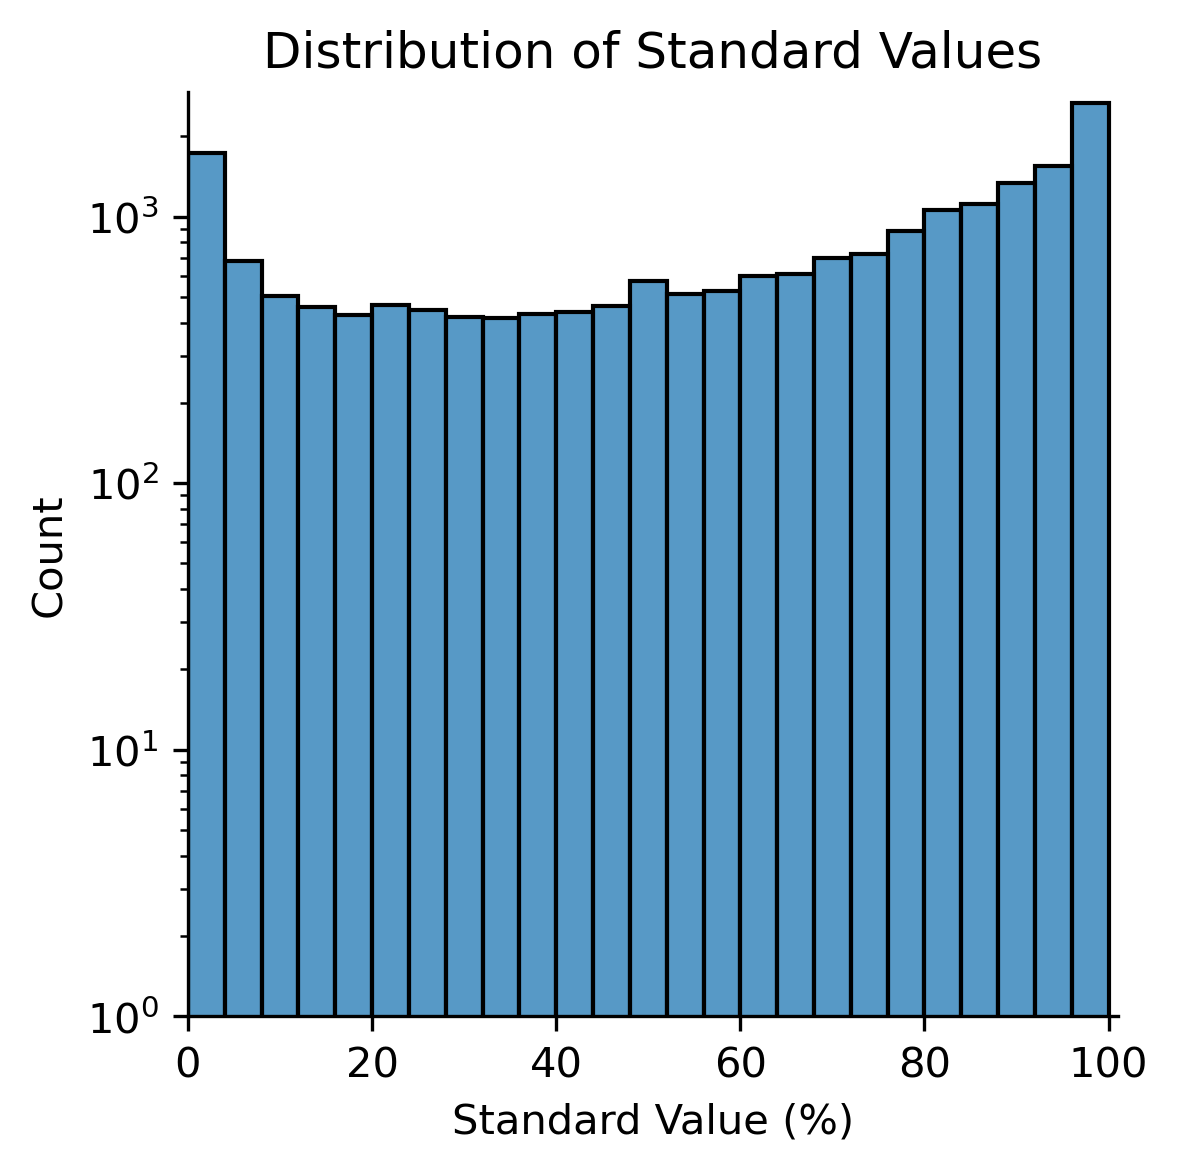

In [22]:
#Set up our plot like we usually do
fig, ax = plt.subplots()

#Plot while also specifying the conditions
sns.histplot(data=tidy.loc[(tidy['Standard Units'] == '%') & (tidy['Standard Value'] <= 100)],
             x='Standard Value',
             bins=25,
             binrange=(0,100)
            )

#Prettying up our histogram
ax.set_title('Distribution of Standard Values')
ax.set_xlabel('Standard Value (%)')
plt.yscale('log')
plt.xlim(0,101)
plt.ylim(1)

fig.set_size_inches(4, 4)
fig.set_dpi(300)
sns.despine()

fig.savefig('histo-chembl.pdf', bbox_inches='tight')

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 3</h2>

1pt

Filter the full, tidied dataset according to the following conditions:

<ul>
    <li>Keep rows where a SMILES structure is available</li>
    <li>Keep rows where the <code>'Standard Type'</code> is <code>'Stability'</code></li>
    <li>Keep rows where the <code>'Standard Units'</code> is <code>'%'</code></li>
</ul>

Output the final number of rows in your filtered dataset into this notebook.

In [23]:
#This is just our usual filtering
#Add on the .copy() to make a deep copy
#So we can avoid the warning that pops up
filtered_tidy = tidy.loc[tidy['Smiles'].notna() & (tidy['Standard Type'] == 'Stability') & (tidy['Standard Units'] == '%'), :].copy()

#Reset index to keep it neat
filtered_tidy.reset_index(drop=True, inplace=True)

print(len(filtered_tidy.index))

24501


<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 4</h2>

1pt

Create a new column <code>'class'</code> to classify each row of the filtered dataset from question 3 according to the following conditions and categories:

<ul>
    <li>If <code>'Standard Relation'</code> or <code>'Standard Value'</code> is not available, classify as <code>'unclassified'</code></li>
    <li>If <code>'Standard Relation'</code> indicated as either <code>'='</code> or <code>'~'</code>, then classify according to the following:</li>
    <ul>
        <li><code>'Standard Value'</code> &gt;=60 &rarr; classify as <code>'stable'</code></li>
        <li><code>'Standard Value'</code> &lt;=40 &rarr; classify as <code>'unstable'</code></li>
        <li><code>'Standard Value'</code> between 40 and 60 (exclusive) &rarr; classify as <code>'intermediate'</code></li>
    </ul>
    <li>If <code>'Standard Relation'</code> is either <code>'&gt;'</code> or <code>'&gt;='</code> with <code>'Standard Value'</code>  &gt;=60 &rarr; classify as <code>'stable'</code></li>
    <li>If <code>'Standard Relation'</code> is either <code>'&lt;'</code> or <code>'&lt;='</code> with <code>'Standard Value'</code>  &lt;=40 &rarr; classify as <code>'unstable'</code></li>
    <li>If none of the above conditions are met, then classify as <code>'unclassified'</code></li>
</ul>

Output the counts of each classification.

In [24]:
#Since the classification is complicated
#We can set up a function to feed it the values to determine classification

#For this function, we'll feed it the Standard Relation and Standard Value
def stability_class(std_rel, std_val):
    #If there's any nan, we can set it as unclassified
    if pd.isna(std_rel) or pd.isna(std_val):
        return 'unclassified'

    #Now we follow with the conditions from the question
    if std_rel in ["'='", "'~'"]:
        if std_val >= 60:
            return 'stable'
        elif std_val <= 40:
            return 'unstable'
        else:
            return 'intermediate'
    elif std_rel in ["'<'", "'<='"] and std_val <= 40:
        return 'unstable'
    elif std_rel in ["'>'", "'>='"] and std_val >= 60:
        return 'stable'
    else:
        return 'unclassified'

In [25]:
#Let's run the function to give it a test
stability_class(filtered_tidy.loc[0, 'Standard Relation'], filtered_tidy.loc[0, 'Standard Value'])

'unclassified'

In [26]:
#We can combine it with list comphrension to loop through both columns simultaneously
#While applying our function
#And then assign that list to a new column
filtered_tidy['class'] = [stability_class(rel, val) for rel, val in zip(filtered_tidy['Standard Relation'], filtered_tidy['Standard Value'])]

In [27]:
#Let's see how it looks
filtered_tidy.head().style

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,class
0,CHEMBL455477,BILIVERDIN,None,582.66,1,4.81,"3, biliverdin",C=CC1=C(C)/C(=C/C2=N/C(=C\c3[nH]c(/C=C4\NC(=O)C(C)=C4C=C)c(C)c3CCC(=O)O)C(CCC(=O)O)=C2C)NC1=O,Stability,nan,nan,%,nan,nan,Stable,UO_0000187,nan,nan,nan,nan,0,CHEMBL975900,Metabolic stability in presence of BSA,A,BAO_0000019,assay format,None,None,None,None,None,nan,nan,nan,CHEMBL612558,ADMET,nan,ADMET,CHEMBL1157163,1,Scientific Literature,Bioorg Med Chem,2008,None,nan,nan,nan,nan,unclassified
1,CHEMBL79042,nan,None,672.68,2,2.76,19,CO[C@@]1(NC(=O)c2ccccc2Oc2ccccc2)C(=O)N2C(C(=O)OCc3ccc(C(=O)O)cc3)=C(CSc3nnnn3C)CO[C@@H]21,Stability,'=',63.000000,%,nan,nan,nan,UO_0000187,nan,nan,nan,nan,0,CHEMBL624556,The percent remaining in human plasma after 30 min was determined,A,BAO_0000366,cell-free format,Homo sapiens,CHEMBL3559721,Plasma,None,None,nan,nan,nan,CHEMBL612558,ADMET,nan,ADMET,CHEMBL1132791,1,Scientific Literature,Bioorg Med Chem Lett,2000,None,nan,nan,nan,63.000000,stable
2,CHEMBL5438457,nan,None,345.74,0,1.51,15; J27644,O=C(NO)c1ccc(Cn2c(=O)[nH]c(=O)c3cccc(Cl)c32)cc1,Stability,'=',100.000000,%,nan,nan,nan,UO_0000187,nan,nan,nan,nan,0,CHEMBL5351759,Metabolic stability in human liver microsomes assessed as parent compound remaining at 200 uM preincubated for 5 mins followed by NADPH and measured at 60 mins by LC-MS/MS analysis,A,BAO_0000251,microsome format,Homo sapiens,CHEMBL3559723,Liver,None,Microsome,nan,nan,nan,CHEMBL612558,ADMET,nan,ADMET,CHEMBL5346972,1,Scientific Literature,J Med Chem,2023,None,DOSE = 200.0 microM | TIME = 1.083 hr,nan,nan,100.000000,stable
3,CHEMBL5423557,nan,None,307.31,0,2.21,16,O=C(NO)c1ccc(/C=C/c2nc3ccccc3c(=O)[nH]2)cc1,Stability,'=',58.100000,%,nan,nan,nan,UO_0000187,nan,nan,nan,nan,0,CHEMBL5351759,Metabolic stability in human liver microsomes assessed as parent compound remaining at 200 uM preincubated for 5 mins followed by NADPH and measured at 60 mins by LC-MS/MS analysis,A,BAO_0000251,microsome format,Homo sapiens,CHEMBL3559723,Liver,None,Microsome,nan,nan,nan,CHEMBL612558,ADMET,nan,ADMET,CHEMBL5346972,1,Scientific Literature,J Med Chem,2023,None,DOSE = 200.0 microM | TIME = 1.083 hr,nan,nan,58.100000,intermediate
4,CHEMBL3276277,nan,None,628.20,2,2.38,1c,Cc1nnc(SCC2=C(C(=O)OCOC(=O)C(C)(C)C)N3C(=O)[C@@H](NC(=O)[C@H](N)c4ccccc4)[C@H]3SC2)s1.Cl,Stability,'=',25.000000,%,nan,nan,nan,UO_0000187,nan,nan,nan,nan,0,CHEMBL3279533,"Drug absorption in Lai:COX (Standard)BR mouse assessed as compound remaining in gastrointestinal tract at 17 mg/kg, po after 40 mins",A,BAO_0000218,organism-based format,Mus musculus,CHEMBL3638276,Gastrointestinal tract,None,None,DOSE = 17.0 mg.kg-1 | ROUTE: Oral,nan,nan,CHEMBL612558,ADMET,nan,ADMET,CHEMBL3272189,1,Scientific Literature,J Med Chem,1977,None,nan,nan,nan,25.000000,unstable


In [28]:
#Now to get the counts, we can just use .value_counts()
filtered_tidy['class'].value_counts()

stable          11897
unstable         6071
unclassified     4228
intermediate     2305
Name: class, dtype: int64

In [29]:
#Save the dataset now that we have classifications
#Now we have a tidied up training set
filtered_tidy.to_csv('filtered-classified-chembl.tsv', 
                     sep='\t',
                     index=False
                    )

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>